In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix)

In [92]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [95]:
hotels <- read.csv('./Data/hotels.csv', stringsAsFactors = FALSE, fileEncoding = 'UTF-8')

In [96]:
head(hotels,2)

X,ï..hotel_name,review_date,reviewer_country,reviewer_rating,review_count,review_header,review_tag_list,review_neg_content,review_pos_content,stay,overall_score,clean_score,comfort_score,loc_score,facilities_score,staff_score,value_score,wifi_score
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"The InnCrowd Backpackers' Hostel, Singapore",Reviewed: 14 October 2019,Malaysia,8.0,9,â€œGreat value for moneyâ€,"['â€¢ Leisure trip', 'â€¢ Solo traveller', 'â€¢ Bed in 8-Bed Female Dormitory Room', 'â€¢ Stayed 2 nights', 'â€¢ Submitted via mobile']",The floor was really quite dusty. Also the air-conditioning wasn't quite cold enough and the room felt a little warm,"The location! It is so convenient, a very short walk from the Rochor MRT station. You can also easily walk around Little India as well. Breakfast is provided! I didn't take any but they looked quite decent, and it's really a convenient luxury. The staff is informative and friendly too! There are discounts for various attractions (again, as I was in Singapore to meet up with friends I didn't go for any attractions) which I think is a good deal as well.",Stayed in October 2019,7.8,7.3,7,8.7,7.4,8.4,8,7.8
2,"The InnCrowd Backpackers' Hostel, Singapore",Reviewed: 12 October 2019,United Kingdom,7.5,4,â€œThey allowed me to shorten my stay without paying which I...â€,"['â€¢ Leisure trip', 'â€¢ Solo traveller', 'â€¢ Bed in 8-Bed Female Dormitory Room', 'â€¢ Stayed 3 nights', 'â€¢ Submitted via mobile']",,They allowed me to shorten my stay without paying which I really appreciated it! The location was perfect as I love Indian food and it was in Little India :) Breakfast was nice. The staff members were nice,Stayed in October 2019,7.8,7.3,7,8.7,7.4,8.4,8,7.8


In [88]:
names(hotels)[1] <- 'hotel_name'

In [89]:
str(hotels)

'data.frame':	6410 obs. of  19 variables:
 $ hotel_name        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ï..hotel_name     : chr  "The InnCrowd Backpackers' Hostel, Singapore" "The InnCrowd Backpackers' Hostel, Singapore" "The InnCrowd Backpackers' Hostel, Singapore" "The InnCrowd Backpackers' Hostel, Singapore" ...
 $ review_date       : chr  "Reviewed: 14 October 2019" "Reviewed: 12 October 2019" "Reviewed: 12 October 2019" "Reviewed: 9 October 2019" ...
 $ reviewer_country  : chr  "Malaysia" "United Kingdom" "Netherlands" "Israel" ...
 $ reviewer_rating   : num  8 7.5 8.3 9.6 9.6 7.5 6.3 6.3 9.2 7.5 ...
 $ review_count      : int  9 4 15 1 9 32 3 1 1 18 ...
 $ review_header     : chr  "â\200œGreat value for moneyâ\200\235" "â\200œThey allowed me to shorten my stay without paying which I...â\200\235" "â\200œCommon room is nice, they give various tips on what you can...â\200\235" "â\200œAwesome place for backpackers â\200\235" ...
 $ review_tag_list   : chr  "['â\200¢ Leisure trip', 'â\200¢ 

In [90]:
dim(hotels)

[1] 6410   19

## Review Count for each hotel

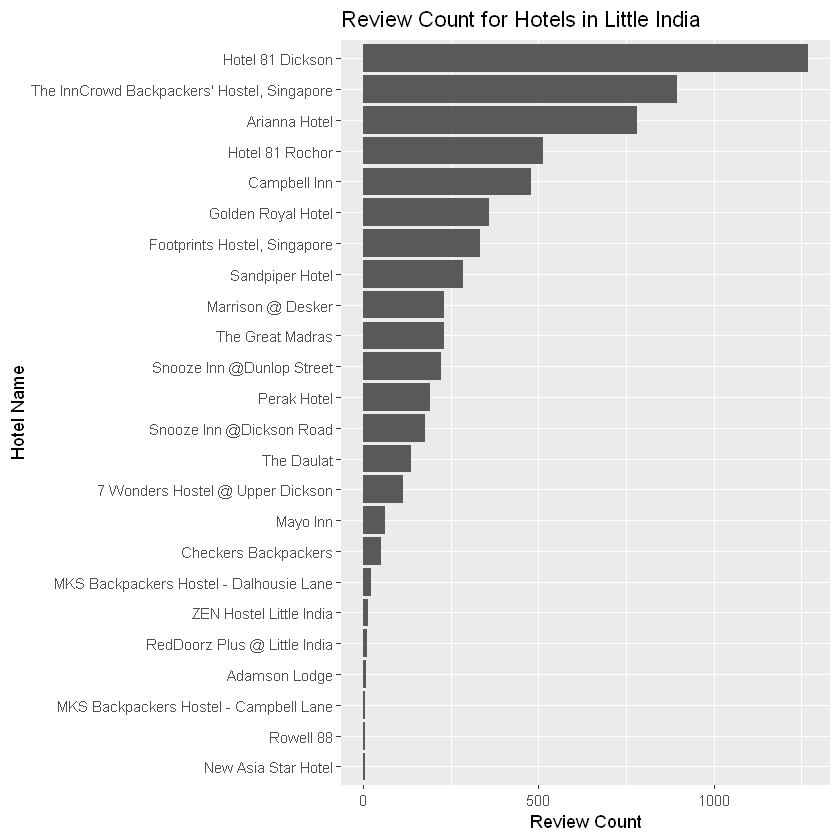

In [78]:
hotels %>%
    group_by(hotel_name) %>%
    summarize(rev_count = n()) %>%
    arrange(-rev_count) %>%
    ggplot(aes(x = reorder(as.factor(hotel_name),rev_count), y = rev_count)) + geom_bar(stat = 'identity') + coord_flip() +
    labs(x = 'Hotel Name', 
         y = 'Review Count', 
         title = "Review Count for Hotels in Little India")

In [82]:
hotels$review_header[1]

[1] "â\200œGreat value for moneyâ\200\235"